In [1]:
import matplotlib.pyplot as plt ### plotting things
import numpy as np ## one of python's main maths packages
import pandas as pd ## for reading in our data
from scipy.optimize import curve_fit ## for fitting a line to our data
import matplotlib.ticker as ticker ## this one lets us change some parameters in our plots.
%matplotlib inline 
%config InlineBackend.figure_format = 'retina' 
from IPython.display import display, Markdown
plt.rcParams.update({'font.size':15})   # A decent font size so the text is readible. 


In [2]:
data = pd.read_excel('BoltData.xlsx', 
                        names=('distance', 'err_distance', 'time', 'err_time'), 
                        usecols=(0,1,2,3), 
                        nrows=11)

# Adding a best fit line

## Overview:
- **Teaching:** 5 min
- **Exercises:** 5 min

**Questions**
- How do you add a best fit line?
- What is it actually doing?

**Objectives**
- Fit a best fit line with `scipy`
- Add the line to the plot
- Adding a legend

The final thing to do is to add a line of best fit to our plot. We can get a least-squares fit to our data using `curve_fit`.

First we set up the function that we want to fit to our data:
```python 
def line(x, slope, intercept):          
    return slope*x + intercept
```
Here we've defined our `line` function to fit an equation of the form
$$ y = m x + c $$
to the data, where $m$ is the slope and $c$ is the intercept.
Next we pass this function and the x and y data to `curve_fit`:
```python
popt, pcov = curve_fit(line,data.distance,data.time)
```
This will find the best fit line to our `distance` and `time` data and send the parameters to the `popt` and `pcov` variables.

## Information: popt, pcov
`popt` and `pcov` are arrays that contain information about the best-fit line. `popt` contains the values of the slope and intercept.
```python
slope = popt[0]
intercept = popt[1]
```
and `pcov` contains the variances
```python
err_slope = np.sqrt(float(pcov[0][0]))
err_intercept = np.sqrt(float(pcov[1][1]))
```

In [3]:
def line(x, slope, intercept):          # Set up the linear fitting - don't ammend
    return slope*x + intercept          # More set up, leave alone.

# Next few line, fits a line to the (x data, and y data) no need to change things.
popt, pcov = curve_fit(line,data.distance,data.time)
slope = popt[0]
intercept = popt[1]
err_slope = np.sqrt(float(pcov[0][0]))
err_intercept = np.sqrt(float(pcov[1][1]))

We can print the parameters and their uncertainties to the screen using `print`

In [4]:
print('Slope: {0:.3f} +- {1:.3f}'.format(slope, err_slope))
print('Intercept: {0:.3f} +- {1:.3f}'.format(intercept, err_intercept))

Slope: 0.100 +- 0.005
Intercept: -0.048 +- 0.270


## Final plot

We can now add the best fit line to the plot.

As this plot will have more than just the data on it we should include a legend describing what's being shown. We can also add the equation of the line to the figure so everything is self-contained within one file.

In the example below we now use the `label` keyword in `ax.errorbar`. `label` specifies the text that will be used on the legend for the things you're plotting.

The best fit line is added using `ax.plot`. The `x` values are the `x` values of the data (i.e. the distances). The `y` values are the value of the best fit line equation at each point. 

We add the legend using two lines of code:

```python
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1],labels[::-1],loc=0, numpoints=1)
```
The first line grabs the `handles` - the plotting sybols - and the `labels` for each thing we've added to the plot.
The second line adds the legend.

When adding the legend, we reverse the order of the `handles` and `labels` using `handles[::-1]`. This makes it so the thing we plotted first is at the top of the legend.

`loc=0` tells `legend` to pick the best position to draw the legend. You can read more details about legends [here](https://matplotlib.org/3.1.0/api/_as_gen/matplotlib.pyplot.legend.html)

Finally, we add the best fit line equation to the plot using `annotate`:
```python
annotation ='$t = {0:.3f} ( \pm {1:.3f})d {2:+.3f} (\pm {3:.3f})$'.format(slope, err_slope, intercept, err_intercept)
ax.annotate(annotation, xy=(70, 1), xycoords='data', ha='center', bbox=dict(boxstyle="round", fc="w"))
```

The `annotation` line defines the text that we want to print. Here we can control the format of the text. Details of the Python formatting syntax are [here](https://docs.python.org/3/library/string.html#format-specification-mini-language). You can use latex to add maths symbols to your text. 

The `annotate` line specifies where and how the annotation is placed. 



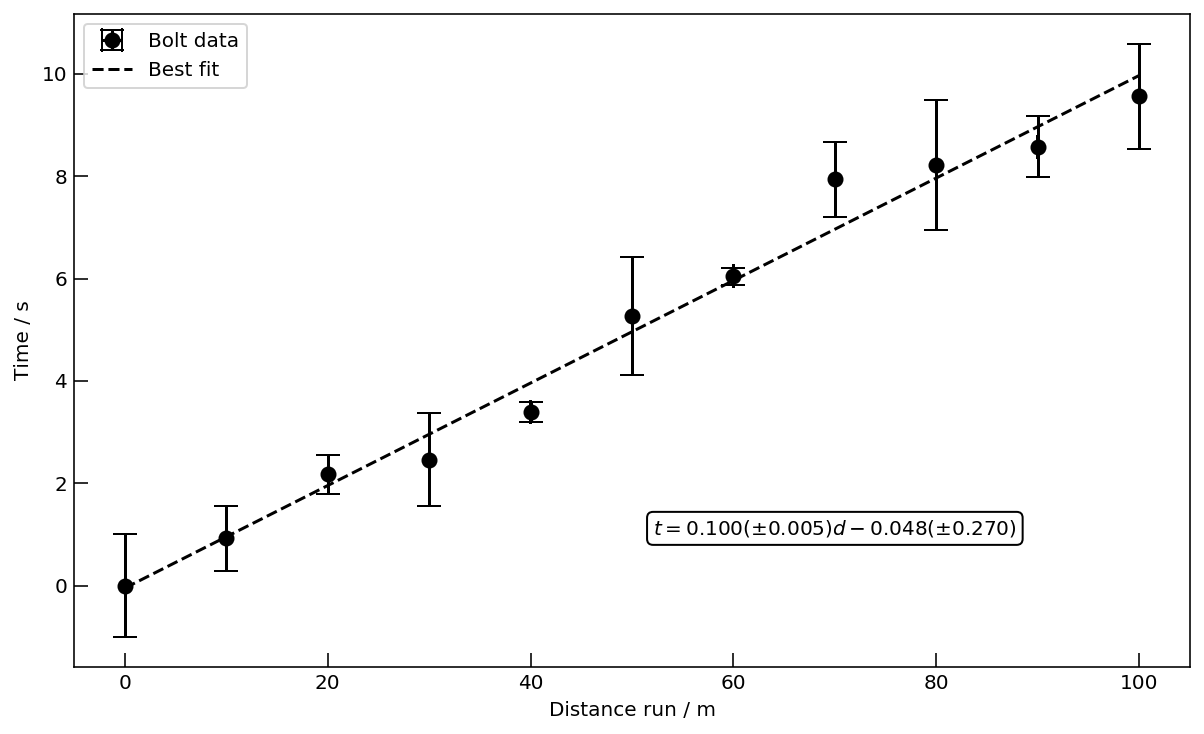

In [5]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(1,1,1)
ax.errorbar(data.distance,           
             data.time,              
             xerr=data.err_distance, 
             yerr=data.err_time,     
             marker='o',             
             markersize = 7,        
             color='black',         
             ecolor='black',        
             markerfacecolor='black',
             linestyle='none',       
             capsize=6,  
             label = "Bolt data"
             )

ax.set_xlabel('Distance run / m')
ax.set_ylabel('Time / s')

ax.tick_params(direction='in',      
                length=7,           
               )
ax.plot(data.distance, data.distance*slope+intercept, 
         linestyle='--',
         color='black',
         label='Best fit')

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1],labels[::-1],loc=0, numpoints=1)
annotation ='$t = {0:.3f} ( \pm {1:.3f})d {2:+.3f} (\pm {3:.3f})$'.format(slope, err_slope, intercept, err_intercept)
ax.annotate(annotation, xy=(70, 1), xycoords='data', ha='center', bbox=dict(boxstyle="round", fc="w"))
plt.show()

## Exercise: Make your final plot
Edit the code so that the best fit line is a different colour and the legend is in a different place. Information about how to change the legend can be found [here](https://matplotlib.org/3.1.1/tutorials/intermediate/legend_guide.html)

[solution]()

## Solution+: Make your final plot

The position of the legend is controlled by the `loc` parameter. You can pass it an integer, or your can tell it with words! Here I'm telling it to put the legend in the `lower right` corner.

The colour of the best fit line is controlled in the same way as for the plot symbols in the previous exercise, using the `color` parameter


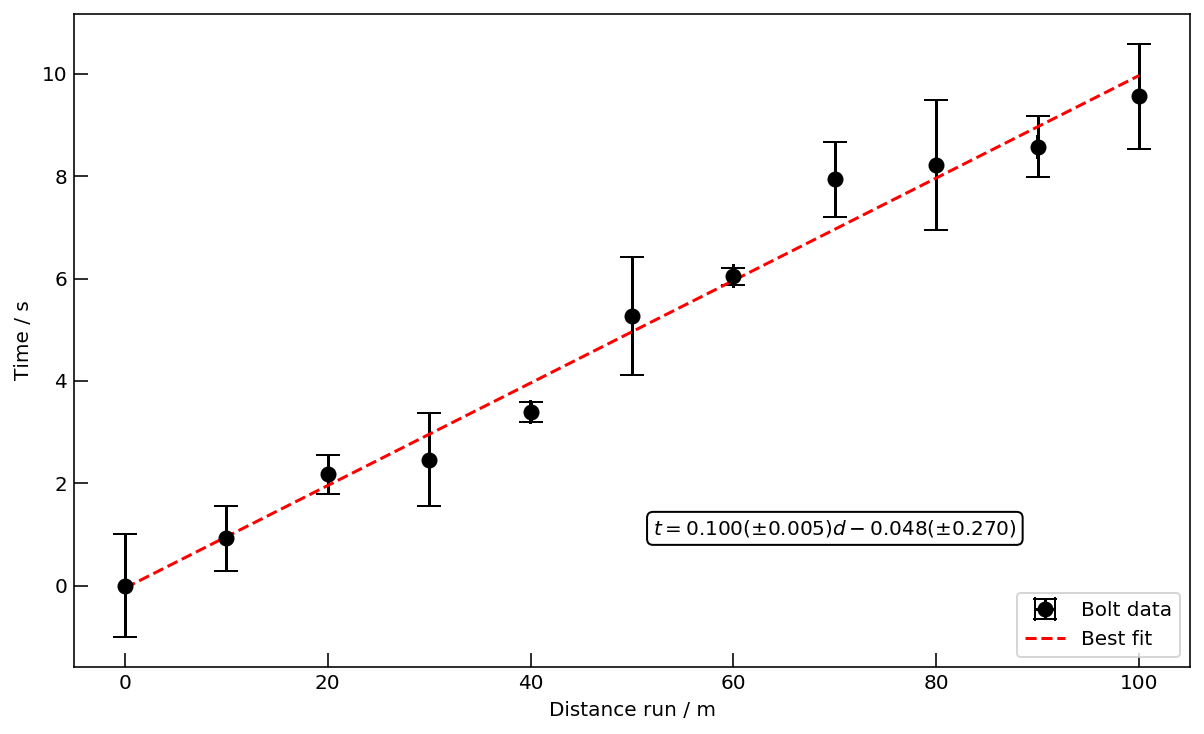

In [6]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(1,1,1)
ax.errorbar(data.distance,           
             data.time,              
             xerr=data.err_distance, 
             yerr=data.err_time,     
             marker='o',             
             markersize = 7,        
             color='black',         
             ecolor='black',        
             markerfacecolor='black',
             linestyle='none',       
             capsize=6,  
             label = "Bolt data"
             )

ax.set_xlabel('Distance run / m')
ax.set_ylabel('Time / s')

ax.tick_params(direction='in',      
                length=7,           
               )
ax.plot(data.distance, data.distance*slope+intercept, 
         linestyle='--',
         color='red', ## changing the line colour to red
         label='Best fit')

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1],labels[::-1],loc='lower right', numpoints=1) ## moving the legend
annotation ='$t = {0:.3f} ( \pm {1:.3f})d {2:+.3f} (\pm {3:.3f})$'.format(slope, err_slope, intercept, err_intercept)
ax.annotate(annotation, xy=(70, 1), xycoords='data', ha='center', bbox=dict(boxstyle="round", fc="w"))
plt.show()

:solution+

## Saving the plot to a file

The last thing we need to do is save our plot. **Be careful!** You won't get a warning if you're going to overwrite an existing file, so make sure to give your figure a new name. 

In [7]:
fig.savefig('fancy.png', dpi=300) 

## Key Points:
- You can fit a best fit line with `scipy`
- Plot the line using `ax.plot`
- Using `legend` `loc=0` will put your legend in the best place.
- `matplotlib` won't warn you if you're going to overwrite a file, so be careful!

These notebooks contain everything you need to make a clear, basic scientific plot. It you want more advanced stuff then you'll need to do more reading. See the help for `matplotlib` and have a look at the tutorials: http://blogs.bath.ac.uk/python/data-analysis-with-jupyter-notebooks/